
# Project: Investigate Dataset of (tmdb-movies) Data wrangling & Analysis & Visualization  

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I will use tmdb data set from [kaggle](www.kaggle.com) to the second project in Nano degree program. The aim of this study:
- Compare independent variables that are potentially affecting the revenue.
- Identify the most common genre in the movies using word cloud
### During this
- I will clean the dataset and select the independent variables that will use for the analysis.
- Extracting initial insights using descriptive statistics.
- Visualize my outcomes to deliver the conclusions


### Importing  pacakages

In [134]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set_style("dark")
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Importing the dataset

In [123]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

## Data Cleaning:
Select the dependent and independent variables for this analysis:
The aim of this  analysis is to test three independent variables  'budget', 'popularity', 'genres' to determine which of them is most effective on the revenue of the movie.


In [124]:
# creating df for the select columns
df1 = df[['revenue', 'budget', 'popularity', 'runtime', 'genres']]
df1.head()

revenue     budget  popularity  runtime  \
0  1513528810  150000000   32.985763      124   
1   378436354  150000000   28.419936      120   
2   295238201  110000000   13.112507      119   
3  2068178225  200000000   11.173104      136   
4  1506249360  190000000    9.335014      137   

                                      genres  
0  Action|Adventure|Science Fiction|Thriller  
1  Action|Adventure|Science Fiction|Thriller  
2         Adventure|Science Fiction|Thriller  
3   Action|Adventure|Science Fiction|Fantasy  
4                      Action|Crime|Thriller

### Checking for null values & data types

In [125]:


df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   revenue     10866 non-null  int64  
 1   budget      10866 non-null  int64  
 2   popularity  10866 non-null  float64
 3   runtime     10866 non-null  int64  
 4   genres      10843 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 424.6+ KB


In [126]:
df1.isnull().sum()

revenue        0
budget         0
popularity     0
runtime        0
genres        23
dtype: int64

- Data type is OK!
- Dropping the missing values in genres due to the small number of nulls that will not affect the analysis only 23 missing.

In [127]:
# dropping the nulls 
df1.dropna(inplace = True)
df1.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


revenue     budget  popularity  runtime  \
0  1513528810  150000000   32.985763      124   
1   378436354  150000000   28.419936      120   
2   295238201  110000000   13.112507      119   
3  2068178225  200000000   11.173104      136   
4  1506249360  190000000    9.335014      137   

                                      genres  
0  Action|Adventure|Science Fiction|Thriller  
1  Action|Adventure|Science Fiction|Thriller  
2         Adventure|Science Fiction|Thriller  
3   Action|Adventure|Science Fiction|Fantasy  
4                      Action|Crime|Thriller

### The data is ready for exploratory analysis!

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 

#### Creating pairplot to take an overview and detect the potential relation between variables visually 

#### Using corr() method to detect it numerically 


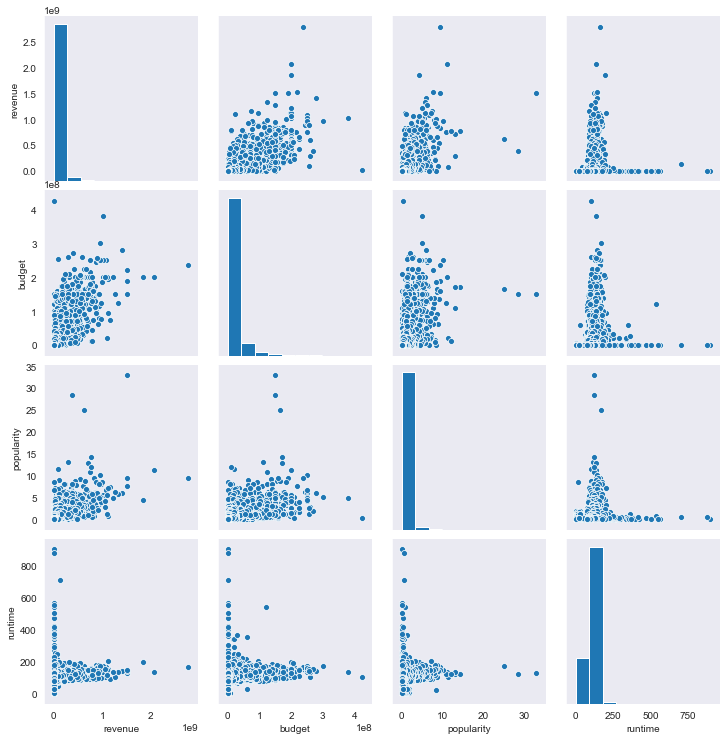

In [128]:
sns.pairplot(df1)

In [129]:
df1.corr()

revenue    budget  popularity   runtime
revenue     1.000000  0.734824    0.663266  0.162764
budget      0.734824  1.000000    0.545263  0.191061
popularity  0.663266  0.545263    1.000000  0.138434
runtime     0.162764  0.191061    0.138434  1.000000

### Initial notes:
- The Higher budges makes more profits for the movies.
- The revenue is not affected with runtime.
- The popularity have positive moderate correlation with the revenue.


### Creating Bar Chart to compare the highest 12 revenue with their popularity

In [132]:
highest_12 = df1[['revenue', 'budget']]
highest_12 = highest_12.iloc[0:12]
highest_12 = highest_12.sort_values('budget', ascending = False)
highest_12 = highest_12.sort_index()
highest_12

revenue     budget
0   1513528810  150000000
1    378436354  150000000
2    295238201  110000000
3   2068178225  200000000
4   1506249360  190000000
5    532950503  135000000
6    440603537  155000000
7    595380321  108000000
8   1156730962   74000000
9    853708609  175000000
10   880674609  245000000
11   183987723  176000003

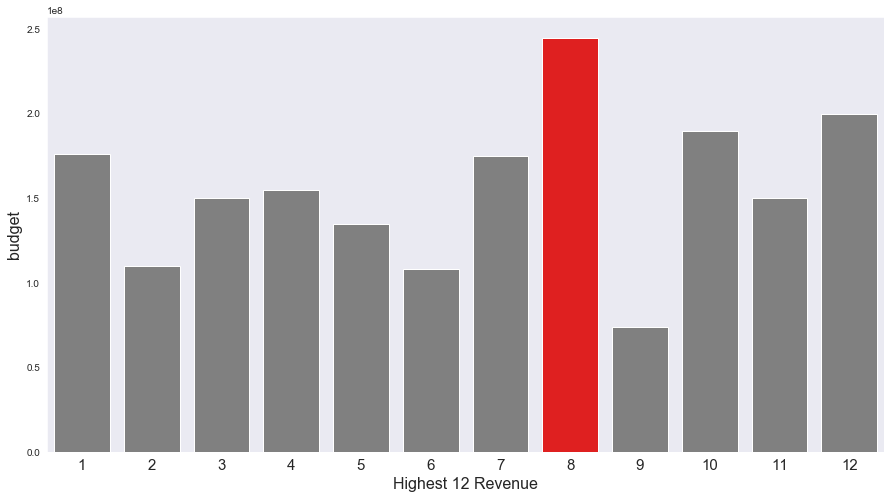

In [133]:
plt.figure(figsize=(15, 8))
c = ['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'red', 'grey', 'grey', 'grey', 'grey']
label = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ax = sns.barplot(data = highest_12, x = 'revenue', y ='budget', palette =c)
ax.set_xticklabels(labels= label, fontsize=15)
ax.set_xlabel(xlabel='Highest 12 Revenue', fontsize=16)
ax.set_ylabel(ylabel='budget', fontsize=16);


#### Despite the correlation between High budget and high revenue, it's obvious in this chart that higher budget does not necessary leads to high revenue   

### Research Question 2  
### What is the most common genre?
#### To answer this question I will use word cloud to detect the most repeated word in genre column

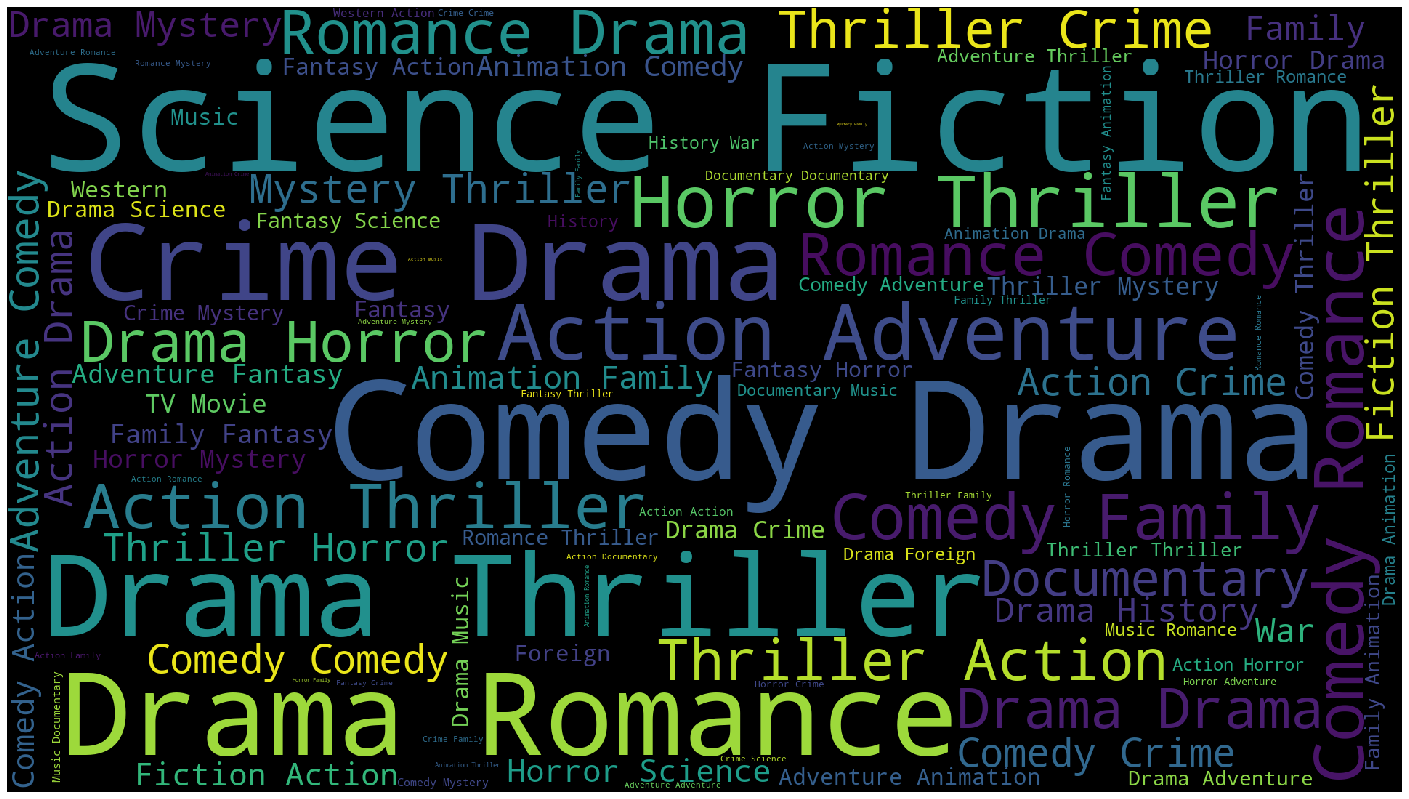

In [135]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df1.genres))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

<a id='conclusions'></a>
# Conclusions
## For the 1st question:
- The most correlated variables that increase the profit is the budget.
- Higher budget does not always mean higher profit 
## For The second question:
### The most popular genres are:
- Science Fiction.
- Comedy Drama
- Drama Thriller
- Drama Romance
